# Курс "Введение в анализ данных", весна 2018
## Семинар 3. Scikit-learn

In [1]:
import numpy as np

На этом семинаре мы: 
- познакомимся с популярной библиотекой для машинного обучения [scikit-learn](http://scikit-learn.org/stable/);
- поговорим про оценку качества алгоритмов и кросс-валидацию;
- решим несколько простых задач машинного обучения с помощью scikit-learn.

In [ ]:
np.

scikit-learn — это библиотека...:
- с большинством популярных и не очень алгоритмов машинного обучения с __единым интерфейсом работы__;
- с большинством необходимым для машинного обучения вспомогательных утилит (преобразование признаков, метрики для оценки качества, ...);
- с подробной документацией и множеством примеров решения задач.

Можно сказать, что почти любой алгоритм, с которым вы столкнётесь (если это не связано со свежей статьёй или нейросетями), уже реализован в scikit-learn. Не бойтесь лезть в поисковик или [документацию](http://scikit-learn.org/stable/).

__Начнём.__

Импортируем необходимые библиотеки:

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Посмотрим на разделы:

In [3]:
from sklearn import datasets

- datasets — "игрушечные датасеты", функции для генерации или загрузки выборок
- feature_extraction — функции для извлечения признаков
- linear_model — линейный модели машинного обучения
- metrics — метрики для оценки качества алгоритмов
- preprocessing — преобразование признаков
- ...

Можно даже подходить к решению задач с помощью scikit-learn по следующей схеме. Хотя на самом деле она вам вряд ли понадобится (базовое представление будет и так в вашей голове).
![](sklearn_scheme.jpg)

Давайте решим несколько задач машинного обучения с помощью scikit-learn и убедимся, что разные виды задач решаются сходим образом. 

### Задача классификации

Воспользуемся стандартным набором данных для классификации цветков ириса на 3 класса.

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [8]:
X = iris['data']
iris['data'].shape
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

То есть выборка состоит из 150 объектов и 4 признаков. Признаки:

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Целевая переменная и названия классов:

In [9]:
y = iris['target']
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

Посмотрим на распределение двух признаков:

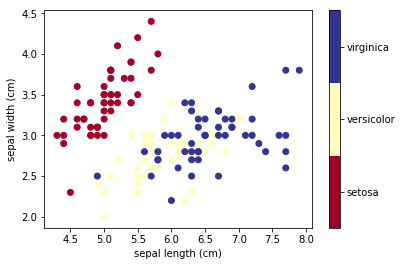

In [7]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

Заметим, что уже по этим двум признакам визуально можно резделить часть объектов на классы. 

Построим решающее дерево, классифицирующее объекты (не будем вдаваться в подробности этого метода). Импортируем его:

In [10]:
from sklearn.tree import DecisionTreeClassifier

Обучим и сделаем предсказания:

In [11]:
classifier = DecisionTreeClassifier()
classifier.fit(X, y)
y_predict = classifier.predict(X)
y_predict.shape

(150L,)

Посчитаем долю правильно классифицированных объектов:

In [12]:
np.mean(y_predict == y)

1.0

Всё ли мы сделали верно?

Мы обучались и тестировались на одной и той же выборке. Наш алгоритм хорошо настроился на этой выборке и показал максимально возможный результат. Мы __переобучились__ на нашей обучающей выборке.

Однако в реальности нам вряд ли нужен алгоритм, который будет корректно классифицировать те же самые объекты, метки которых мы и так знаем. Поэтому в машинном обучении важно настраивать алгоритмы и оценивать их качество __на разных выборках__.

Разделим нашу выборку на 2 равных части: обучающую и контрольную выборки. Для этого воспользуемся функцией из scikit-learn.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

Снова обучим алгоритм и сделаем предсказание уже на тестовой выборке:

In [14]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

Оценим качество:

In [15]:
np.mean(y_predict == y_test)

0.90666666666666662

Теперь уже не все объекты верно классифицированы. В реальном мире почти нет задач, где можно получить идеальные предсказания с помощью машинного обучения.

Заметим, что в последнем эксперименте мы проигнорировали половину выборки для обучения и оценивали качество так же только по половине выборки. Хочется использовать всю выборку для оценки качества. Для этого вместо использования __отложенной выборки__ используется такая техника, как __кросс-валидация__.

![](cv.png)

Суть заключается в том, что мы делим выборку на несколько частей, для каждой из частей мы обучаем на оставшихся (за исключением текущей) частях алгоритм и оцениваем качество на выбранной части. Посчитанные метрики для каждой из частей усредняем.

Для кросс-валидации можно использовать функцию из scikit-learn. Разбиение можно задавать различными способами, но мы будем пользоваться самым простым: случайно на 2 части.

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(classifier, X, y, scoring='accuracy', cv=5).mean()

0.96666666666666679

То есть наш pipeline был следующим:

1. Загрузить данные;
2. Обработать их при надобности, визуализировать для понимания;
3. Разбить выборку на обучение и контоль (либо воспользовать кросс-валидацией);
4. Обучить некоторый алгоритм машинного обучения (будут изучаться на лекциях);
5. Оценить качество по некоторой метрике (будут изучаться на лекциях).

### Задача регрессии

Загрузим датасет, в котором необходимо предсказывать цену дома.

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()

In [19]:
X = boston['data']
boston['data'].shape

(506L, 13L)

То есть выборка состоит из 506 объектов и 13 признаков.

In [29]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [30]:
X[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00])

Целевая переменная и названия классов:

In [20]:
y = boston['target']
y[:15]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2])

Воспользуемся линейной регрессией (то есть выразим цену дома как линейную функцию вида $y_i = a_1 x_1 + a_2 x_2 + \dots + a_{13} x_{13}$, где $x_i$ — признаки дома). Оценивать качество будем с помощью среднеквадратичной ошибки (о функционалах ошибки будет позднее в лекциях). Выборку будем разбивать на 3 части.

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)

In [22]:
cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=3).mean()

-168.64665360587239

Попробуем воспользоваться другим алгоритмом — случайным лесом (несколько решающих деревьев, ответы которых усредняются).

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=3).mean()

-28.830009750399171

Качество заметно улучшилось! 

У большинства алгоритмов в scikit-learn есть гиперпараметры. Их настройка может помочь алгоритмы ещё лучше настроиться на конкретную задачу и показать более высокое качество. 

Посмотрим на параметры случайного леса:

In [ ]:
RandomForestRegressor(<press shift+tab>)

Заметим, что решая задачу регрессии, мы делали то же самое, что и в классификации за исключением используемых методов и метрик для оценки качества. Scikit-learn позволяет работать с большинством алгоритмов с помощью одних и тех методов (fit, predict, ...). Это позволяет быстро экспериментировать с различными методами при решении конкретных задач.

### Классификация текстов

In [24]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']

Посмотрим на пример объекта:

In [37]:
data['data'][0]

u"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

Классы:

In [38]:
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Объект представляет собой текст с некоторыми элементами форматирования. Большинство алгоритмов машинного обучения не умеют работать напрямую с текстами. Необходимо представить текст в виде некоторого вектора, чтобы с полученной матрицей объекты-признаки воспользоваться некоторым алгоритмом классификации. Самый простой способ сделать это для текста — посчитать, сколько раз встречается каждое слово в каждом тексте.

Предварительно разделим выборку на обучающую и контрольную выборки:

In [25]:
train, test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.3)

В scikit-learn уже реализован класс для подсчёта встречаемости каждого слова в тексте. У него есть различные параметры, связанные с предобработкой текста.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train)
test_vectors = vectorizer.transform(test)

Так как слов в языке довольно много, при этом малое количество из них встречается в каждом конкретном тексте, то в полученной матрице, где $i,j$ позиции находится число "сколько раз в тексте $i$ встречается слово $j$, возникает много нулевых элементов. Такие матрицы называют разреженными и их удобнее хранить в памяти в ином формате.

In [41]:
train_vectors

<7919x114272 sparse matrix of type '<type 'numpy.int64'>'
	with 927586 stored elements in Compressed Sparse Row format>

In [27]:
train_vectors[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

В процессе кодирования текста мы получили отображение слов в индексы:

In [43]:
vectorizer.vocabulary_

{u'l1tbk': 64917,
 u'nunnery': 77618,
 u'sonja': 95647,
 u'luanch': 67676,
 u'13359': 3466,
 u'woods': 109757,
 u'ree84': 88093,
 u'mdbs': 70688,
 u'hanging': 54120,
 u'woody': 109765,
 u'trawling': 102139,
 u'localized': 67100,
 u'spidery': 96148,
 u'disobeying': 41699,
 u'canes': 32853,
 u'os2faq': 79527,
 u'sprague': 96345,
 u'chatter': 34168,
 u'5980': 13569,
 u'voecking': 107165,
 u'gab': 50677,
 u'crossbar': 37997,
 u'rickman': 89567,
 u'c5jh23': 32009,
 u'ioannidis': 59705,
 u'155637': 4255,
 u'rscharfy': 90767,
 u'_xogkyrzaup': 21510,
 u'naturopathic': 75685,
 u'slqfbql': 95061,
 u'mennon': 71152,
 u'ua8cx': 103368,
 u'y73': 112098,
 u'broward': 30775,
 u'4kqw': 12467,
 u'screaming': 92658,
 u'dascenzo': 39381,
 u'wooded': 109748,
 u'735253985': 16327,
 u'remialcsid': 88570,
 u'np2p8az_g': 77308,
 u'wooden': 109749,
 u'wednesday': 108625,
 u'andrei_lomakin': 24625,
 u'circuitry': 34832,
 u'598n': 13571,
 u'crrob': 38039,
 u'jujuga': 62187,
 u'amplifications': 24422,
 u'v6jylh':

Воспользуемся логистической регрессией (линейный алгоритм для классификации), обучим его и оценим качество (долю верно предсказанных категорий) на отложенной выборке.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier = LogisticRegression()
classifier.fit(train_vectors, y_train)
y_predict = classifier.predict(test_vectors)

In [30]:
np.mean(y_predict == y_test)

0.88394698085419732

Опять же мы делали все те же самые действия и использовали почти только один scikit-learn.

Нам так же могло понадобиться:
- закодировать строковый категориальный признак числами (sklearn.preprocessing.LabelEncoding)
- воспользовать одной из реализованных метрик для оценки качества (sklearn.metrics)
- ...